# Imports

In [1]:
import pynncml as pnc 
from matplotlib import pyplot as plt

/Users/haihab01/envs/research_base/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load OpenCML Dataset

In [2]:
open_cml_dataset = pnc.read_open_cml_dataset('../dataset/open_cml.p') #  read OpenCML dataset

AttributeError: module 'pynncml' has no attribute 'read_open_cml_dataset'

# Select Link and Plot link data

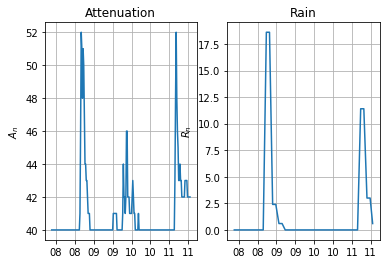

In [25]:
link_index = 14
link_data = open_cml_dataset[link_index] # select a link 
link_data.plot() # plot link data
plt.show()

# Run rain estimation using constant baseline
 

In [26]:
tsc = pnc.rain_estimation.two_step_constant_baseline(pnc.power_law.PowerLawType.MAX,0.1,8,3,wa_factor=2.6) # init classification model
rain,wd = tsc(link_data.attenuation(),link_data.meta_data) # run classification method
print(rain.numpy().max())

3.6941319


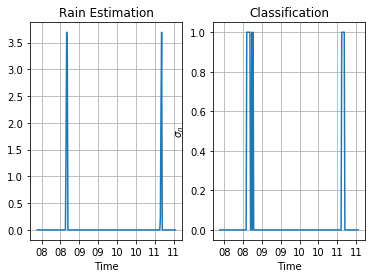

In [27]:
plt.subplot(1, 2, 1)
plt.plot(link_data.time(), rain.numpy()[0, :])
plt.title('Rain Estimation')
plt.xlabel('Time')
pnc.change_x_axis_time_format('%H')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(link_data.time(), wd.numpy()[0, :])
plt.xlabel('Time')
plt.title('Classification')
pnc.change_x_axis_time_format('%H')
plt.ylabel(r'$\sigma_n$')
plt.grid()
plt.show()

# References
[1] Marc Schleiss and Alexis Berne. Identification of dry and rainy periods using telecommunication microwave links. IEEE Geoscience and Remote Sensing Letters, 7(3):611–615, 2010
